1.	Data Cleaning and Preparation:

●	Load the dataset into a DataFrame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion).

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv('Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [42]:
data.shape

(2126, 14)

In [28]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [45]:
data.dropna(inplace=True)

In [46]:
data.shape

(2105, 14)

dataset has reduced from 2126 rows and 14 columns to 2105 rows and 14 columns. This suggests that only a small portion of the data (21 rows, approximately 0.95% of the dataset) contained missing values

In [49]:
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and treat outliers for all numerical columns
outlier_info = {}

for col in data.columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    outlier_info[col] = {
        "Number of Outliers": len(outliers),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
    }
    # Treat outliers by capping them within bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

outlier_info


{'LB': {'Number of Outliers': 10, 'Lower Bound': 105.0, 'Upper Bound': 161.0},
 'AC': {'Number of Outliers': 39,
  'Lower Bound': -0.008474577,
  'Upper Bound': 0.014124295},
 'FM': {'Number of Outliers': 343,
  'Lower Bound': -0.003831417,
  'Upper Bound': 0.006385695},
 'UC': {'Number of Outliers': 13,
  'Lower Bound': -0.005208944500000001,
  'Upper Bound': 0.0135828835},
 'DL': {'Number of Outliers': 124,
  'Lower Bound': -0.004934211,
  'Upper Bound': 0.008223685},
 'DS': {'Number of Outliers': 120, 'Lower Bound': 0.0, 'Upper Bound': 0.0},
 'DP': {'Number of Outliers': 284, 'Lower Bound': 0.0, 'Upper Bound': 0.0},
 'ASTV': {'Number of Outliers': 10,
  'Lower Bound': -11.5,
  'Upper Bound': 104.5},
 'MSTV': {'Number of Outliers': 78, 'Lower Bound': -0.8, 'Upper Bound': 3.2},
 'ALTV': {'Number of Outliers': 317,
  'Lower Bound': -16.5,
  'Upper Bound': 27.5},
 'MLTV': {'Number of Outliers': 81,
  'Lower Bound': -4.850000000000001,
  'Upper Bound': 20.35},
 'Width': {'Number of Outli

2.	Statistical Summary:

●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.


In [54]:

# Calculate summary statistics 
summary = data.describe() 
# Calculate median for each column 
median_values = data.median() 
# Add median to the summary statistics 
summary.loc['median'] = median_values
print(summary)


                 LB           AC           FM           UC           DL  \
count   2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean     133.293227     0.003143     0.001561     0.004358     0.001768   
std        9.979659     0.003843     0.002473     0.003008     0.002672   
min      105.000000    -0.008475    -0.003831    -0.005209    -0.004934   
25%      126.000000     0.000000     0.000000     0.001838     0.000000   
50%      133.000000     0.001631     0.000000     0.004484     0.000000   
75%      140.000000     0.005650     0.002554     0.006536     0.003289   
max      161.000000     0.014124     0.006386     0.013583     0.008224   
median   133.000000     0.001631     0.000000     0.004484     0.000000   

            DS      DP         ASTV         MSTV         ALTV         MLTV  \
count   2105.0  2105.0  2105.000000  2105.000000  2105.000000  2105.000000   
mean       0.0     0.0    46.982677     1.302006     6.727067     8.022202   
std        0.0 

**Consistent Measurements:** Variables like LB and MSTV show consistent measurements with low standard deviations.

**High Variability:** Variables like ALTV and Width have high variability, indicating diverse conditions in the dataset.

**Zero Values:** DS and DP being zero suggest the absence of certain conditions or measurement errors.

3.	Data Visualization:

●	Create histograms or boxplots to visualize the distributions of various numerical variables.

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


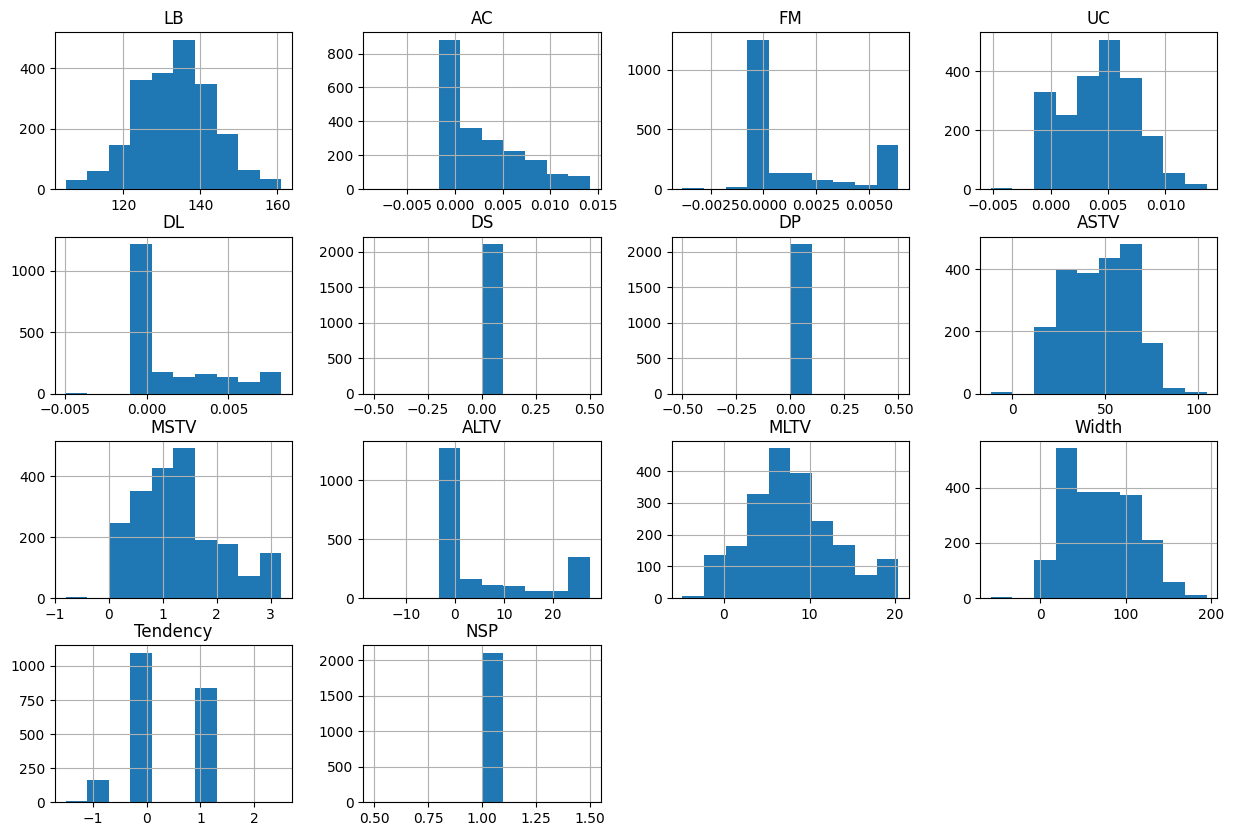

In [57]:
# Histograms
data.hist(figsize=(15, 10))
plt.show()


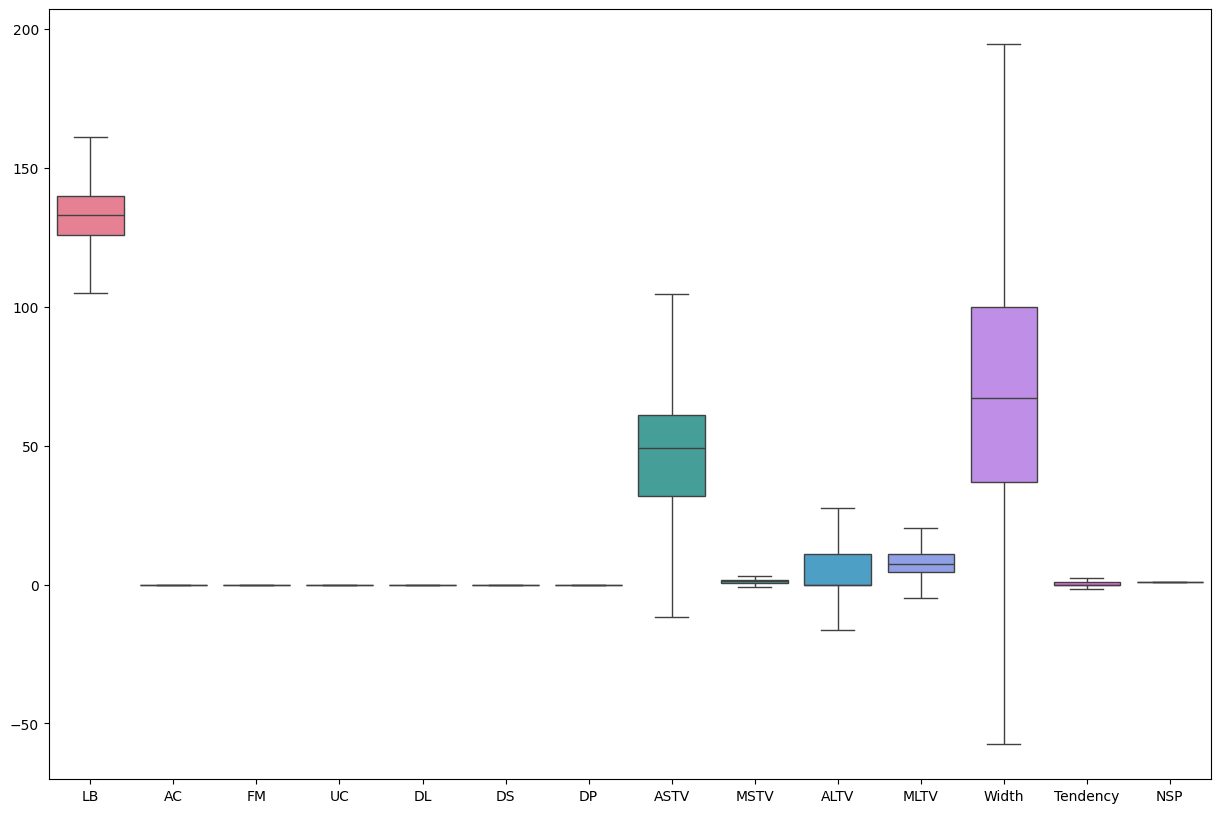

In [59]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.show()


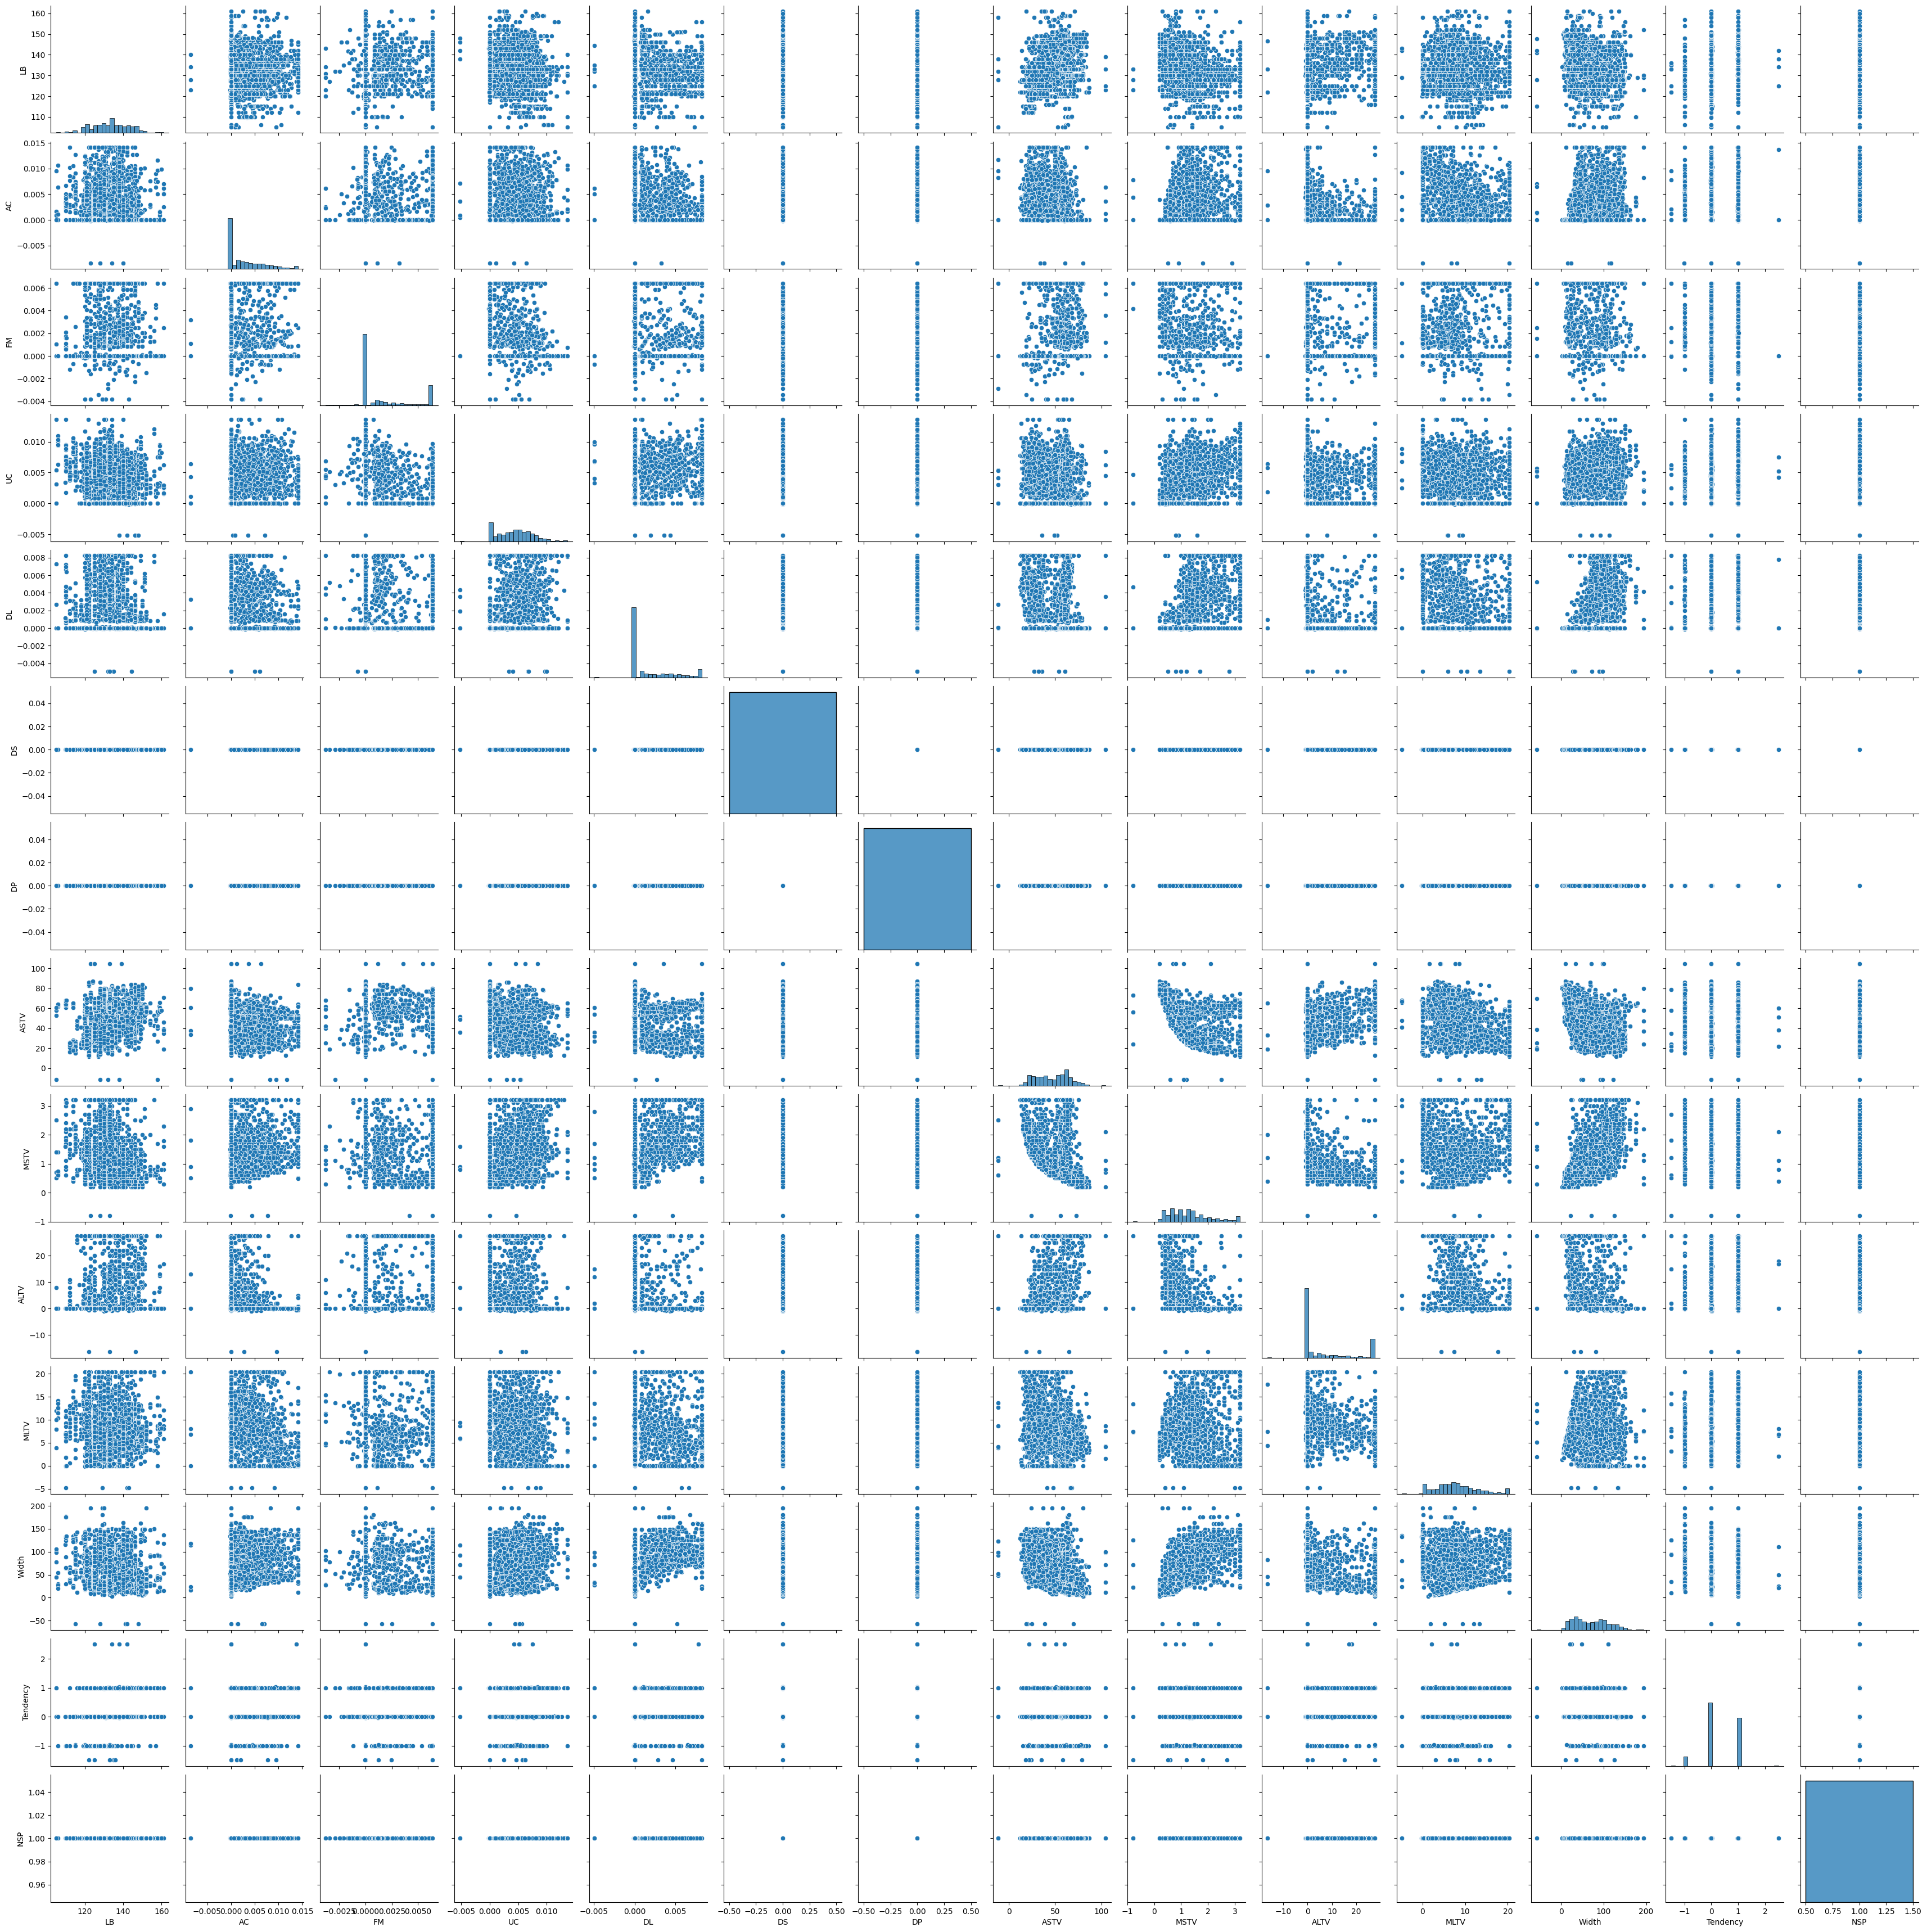

In [60]:
# Scatter plots
sns.pairplot(data)
plt.show()


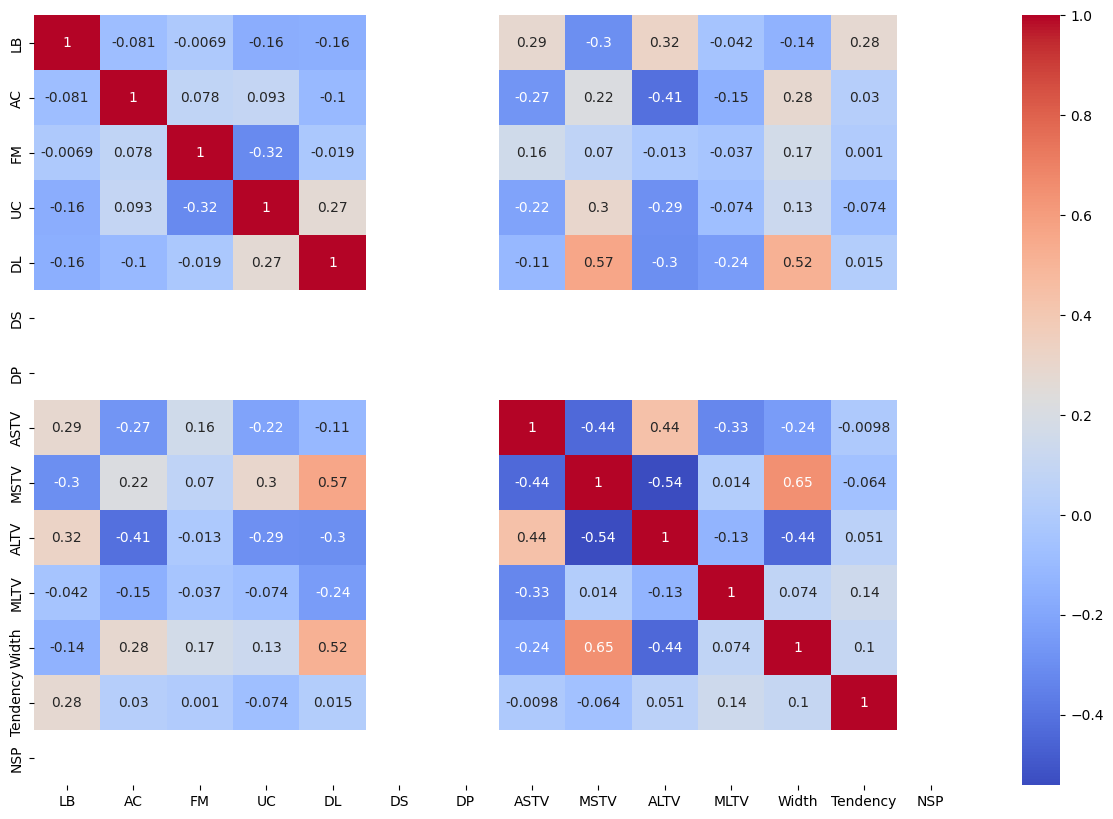

In [61]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


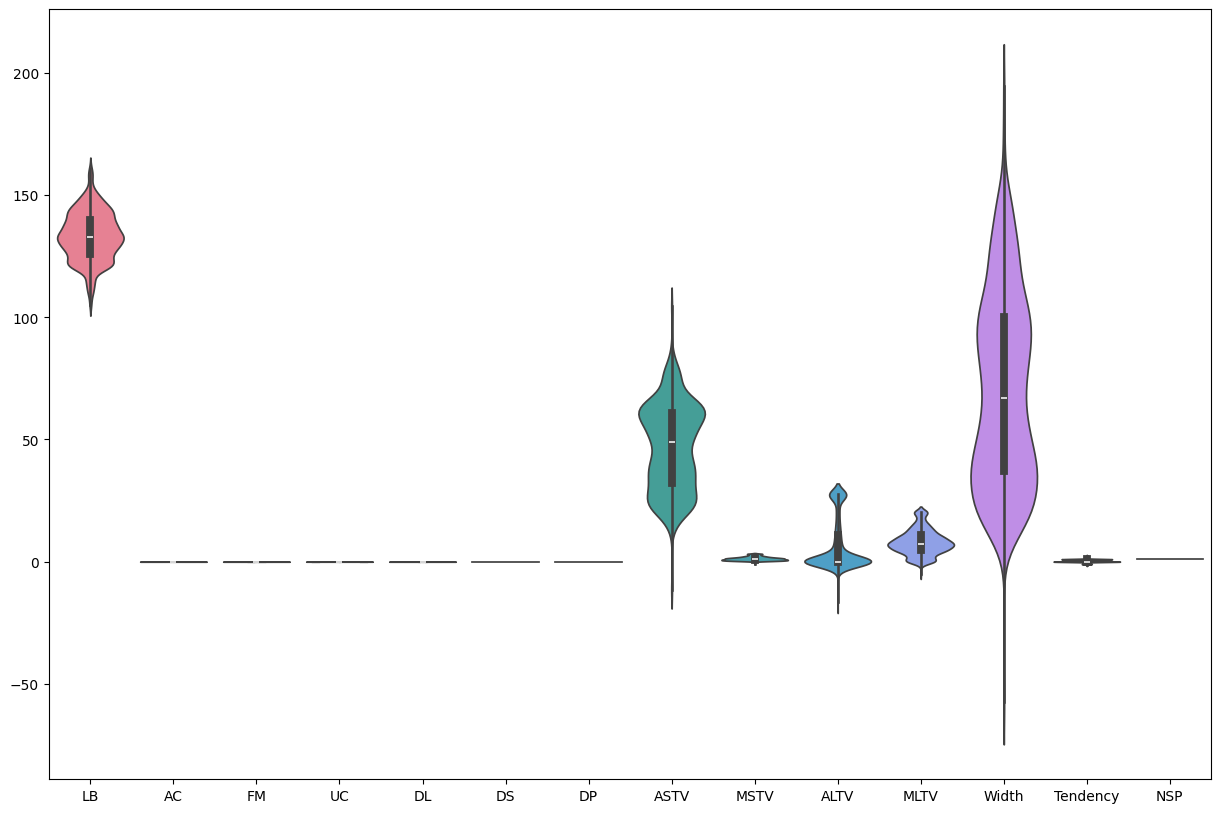

In [62]:
# Violin plots
plt.figure(figsize=(15, 10))
sns.violinplot(data=data)
plt.show()

4.	Pattern Recognition and Insights:

●	Identify any correlations between variables and discuss their potential implications.

●	Look for trends or patterns over time if temporal data is available.


In [70]:
correlation_matrix = data.corr()
correlation_matrix


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080905,-0.006908,-0.163244,-0.156803,NaN,NaN,0.286659,-0.297509,0.323341,-0.041988,-0.140044,0.281012,NaN
AC,-0.080905,1.000000,0.077556,0.092891,-0.103652,NaN,NaN,-0.272180,0.216044,-0.410445,-0.152315,0.284203,0.029620,NaN
FM,-0.006908,0.077556,1.000000,-0.316271,-0.019206,NaN,NaN,0.157023,0.069564,-0.012706,-0.037086,0.165527,0.001003,NaN
UC,-0.163244,0.092891,-0.316271,1.000000,0.270950,NaN,NaN,-0.216136,0.299116,-0.294475,-0.073800,0.132150,-0.073899,NaN
DL,-0.156803,-0.103652,-0.019206,0.270950,1.000000,NaN,NaN,-0.113125,0.566322,-0.295480,-0.242513,0.516534,0.015030,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.286659,-0.272180,0.157023,-0.216136,-0.113125,NaN,NaN,1.000000,-0.435090,0.439183,-0.325637,-0.242006,-0.009825,NaN
MSTV,-0.297509,0.216044,0.069564,0.299116,0.566322,NaN,NaN,-0.435090,1.000000,-0.541421,0.013621,0.650435,-0.063524,NaN
ALTV,0.323341,-0.410445,-0.012706,-0.294475,-0.295480,NaN,NaN,0.439183,-0.541421,1.000000,-0.134150,-0.440533,0.050986,NaN


**Key Insights and Patterns:**

Distribution of Variables:

LB (Baseline Fetal Heart Rate): The heart rate is concentrated around 133 beats per minute with moderate variability. Outliers were identified and capped within the range of 105 to 161.

AC (Accelerations) and FM (Fetal Movements): Both variables showed a significant number of small values or no movement, indicating minimal detected accelerations and fetal movements.

UC (Uterine Contractions): Minimal uterine contractions with some moderate variability.

DL (Decelerations Late): Few significant late decelerations, suggesting general fetal well-being.

DS (Decelerations Short) and DP (Decelerations Prolonged): Entirely zero, indicating no short or prolonged decelerations detected.

Variability Measures (ASTV, MSTV, ALTV, MLTV): Showed a wide range of values indicating variability in both short-term and long-term fetal conditions.

NSP (Non-Stress Test Result): Uniform value of 1, suggesting consistency in test results.

Correlation Analysis:

Positive Correlations:

LB and ALTV: Higher baseline heart rates are associated with higher long-term variability, suggesting that elevated heart rates could be linked with increased long-term variability.

MSTV and DL: Increased short-term variability is strongly associated with late decelerations, potentially indicating stress or distress.

Width and DL: Greater measurement range is linked to late decelerations, indicating that significant variability may be associated with fetal distress.

Negative Correlations:

ASTV and MSTV: Inversely related, indicating that as abnormal short-term variability increases, mean short-term variability decreases.

ALTV and AC: Higher abnormal long-term variability is associated with fewer accelerations.

UC and FM: More uterine contractions are associated with fewer fetal movements, suggesting a relationship between uterine activity and fetal behavior.



